In [2]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns
import scipy

In [3]:
#Create a path
path = r'C:\Users\manny\Documents\Instacart Basket Analysis 05-01-2023'

In [4]:
#import dataframe 
df= pd.read_pickle(os.path.join(path, '02 Data', 'Prepared Data', 'customer_merge.pkl'))

In [34]:
df.dtypes

Unnamed: 0.1                        int64
Unnamed: 0_x                        int64
order_id                            int64
user_id                            object
order_number                        int64
orders_day_of_week                  int64
order_hour_of_day                   int64
days_since_prior_order            float64
product_id                          int64
add_to_cart_order                   int64
reordered                           int64
Unnamed: 0_y                        int64
product_name                       object
aisle_id                            int64
department_id                       int64
prices                            float64
_merge                           category
max_order                           int64
loyalty_flag                       object
avg_ord_prices                    float64
spending_flag                      object
median_days_since_prior_order     float64
med_freq                          float64
customer_frequency                

Text(0, 0.5, 'Frequency')

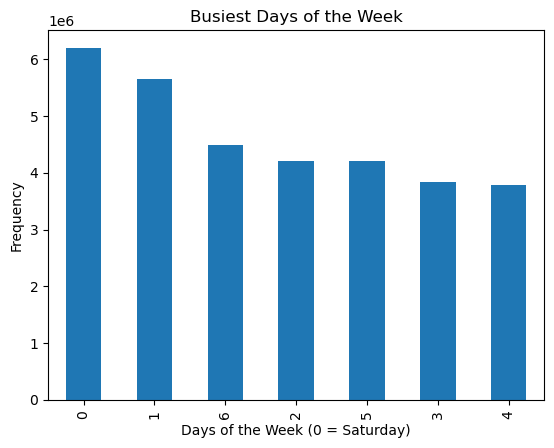

In [8]:
#BAR CHART
bar=df['orders_day_of_week'].value_counts().plot.bar()

plt.title("Busiest Days of the Week")
plt.xlabel("Days of the Week (0 = Saturday)")
plt.ylabel("Frequency")

In [7]:
#Export bar chart
bar.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'bar_ord_days_of_the_week.png'))

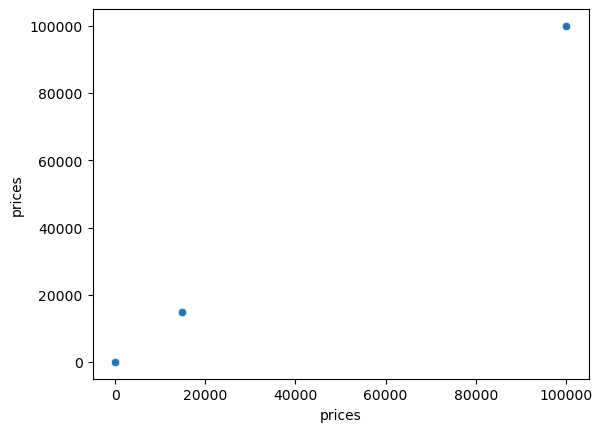

In [8]:
# Create a scatterplot

scatplt = sns.scatterplot(x = 'prices', y = 'prices',data = df)

In [9]:
#Export scatterplot
scatplt.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'scatplt_prices.png'))

In [14]:
#Checking for prices above $100
df.loc[df['prices'] > 100]

,Unnamed: 0.1,Unnamed: 0_x,order_id,user_id,order_number,orders_day_of_week,order_hour_of_day,days_since_prior_order,product_id,add_to_cart_order,...,customer_frequency,first_name,last_name,gender,State,age,Date Joined,total_dependants,marital_status,income
7805,24261,24261,1435153,1519,26,2,11,6.0,21553,15,...,frequent_customer,Craig,Clark,Male,Rhode Island,68,3/4/2020,0,divorced/widowed,177864
7806,24267,24267,1066435,1519,32,3,10,5.0,21553,28,...,frequent_customer,Craig,Clark,Male,Rhode Island,68,3/4/2020,0,divorced/widowed,177864
15143,39073,39073,1697208,2409,33,1,19,5.0,21553,1,...,frequent_customer,Nicole,Odonnell,Female,Hawaii,55,11/11/2018,2,married,230074
20264,57126,57126,965345,3531,27,2,19,8.0,33664,2,...,frequent_customer,Alice,Compton,Female,Hawaii,80,10/6/2019,2,married,233776
20497,61481,61481,2943740,3793,1,2,9,NaN,21553,3,...,regular_customer,Jerry,Allen,Male,Louisiana,59,8/23/2019,3,married,182933
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32303799,854612,854612,3265389,51346,4,1,17,13.0,33664,2,...,regular_customer,nan,Gould,Male,Rhode Island,58,1/25/2019,1,married,207497
32307882,2186800,2186800,1179092,131671,12,4,9,15.0,33664,1,...,regular_customer,Diana,Hansen,Female,Rhode Island,35,8/4/2018,0,single,86490
32310810,658416,658416,1226705,39667,7,2,15,20.0,33664,14,...,non-frequent_customer,Johnny,Colon,Male,Rhode Island,78,5/8/2019,2,married,195077
32330048,1583942,1583942,3000037,95105,2,4,19,22.0,33664,4,...,frequent_customer,Catherine,Browning,Female,South Carolina,48,1/18/2017,2,married,398880


In [11]:
df.loc[df['prices'] >100, 'prices'] = np.nan

In [14]:
#Current max price
df['prices'].max()

25.0

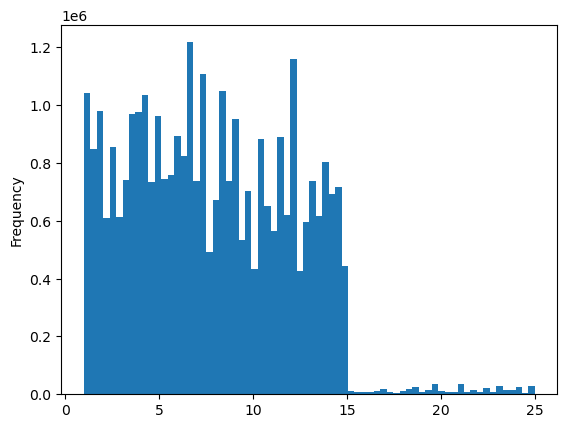

In [15]:
# Create a histogram 

hist = df['prices'].plot.hist(bins = 70)



In [16]:
# Export the histogram

hist.figure.savefig(os.path.join(path,'04 Analysis', 'Visualizations', 'hist_prices_70.png' ))

In [16]:
#Create subset
df_2 = df[:2000000]

In [17]:
#Sampling
np.random.seed(4)

#List of T/F values to test np.random.rand()<=0.7
dev = np.random.rand(len(df)) <= 0.7

In [18]:
dev

array([False,  True, False, ...,  True,  True,  True])

In [19]:
#Store 70% of sample in df big
big = df[dev]

In [20]:
#Store 30% of sample in df big
small = df[~dev]

In [21]:
#check lengths
len(df)

32404859

In [22]:
len(big) + len(small)

32404859

In [23]:
df_small = small[['orders_day_of_week','prices']]

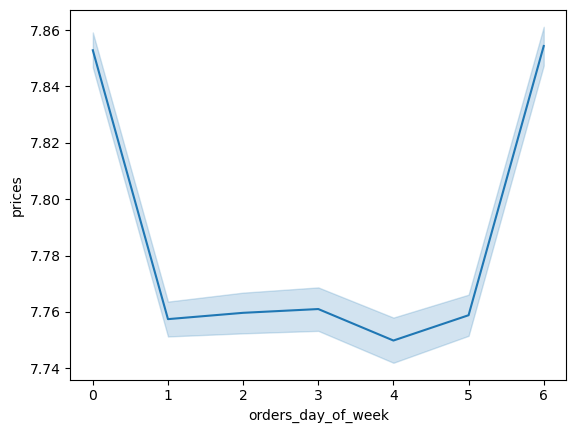

In [25]:
line = sns.lineplot(data = df_small, x = 'orders_day_of_week',y = 'prices')

In [28]:
# Export the line chart

line.figure.savefig(os.path.join(path,'04 Analysis', 'Visualizations', 'line_ords_dow.png' ))

#### You need to provide the Instacart senior stakeholders with descriptive findings about sales. Create a histogram of the “order_hour_of_day” column

Text(0, 0.5, 'Frequency')

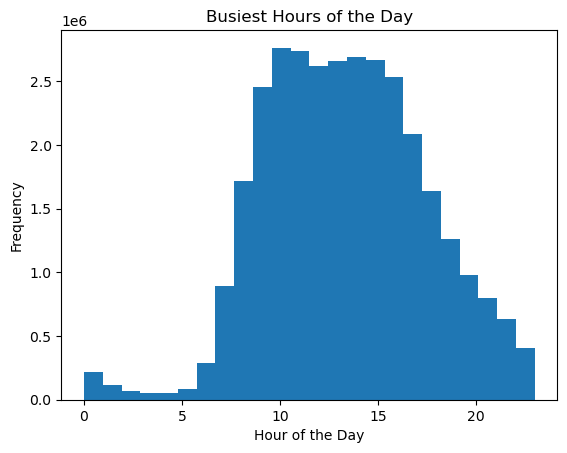

In [10]:
hist_sales_hourly=df['order_hour_of_day'].plot.hist(bins = 24)

plt.title("Busiest Hours of the Day")
plt.xlabel("Hour of the Day")
plt.ylabel("Frequency")

The histogram represents th 24 hour daily order frequency.
As seen, highest frequency occurs from 10 AM - 5PM.
This finding is rationale, given these are waking hours and most shopping are usually done around those time. As the day goes by the order frequency goes down. There is signifficantly less shopping during sleeping hours .

#### The marketing team is curious about the distribution of orders among customers in terms of loyalty. Create a bar chart from the “loyalty_flag” column.

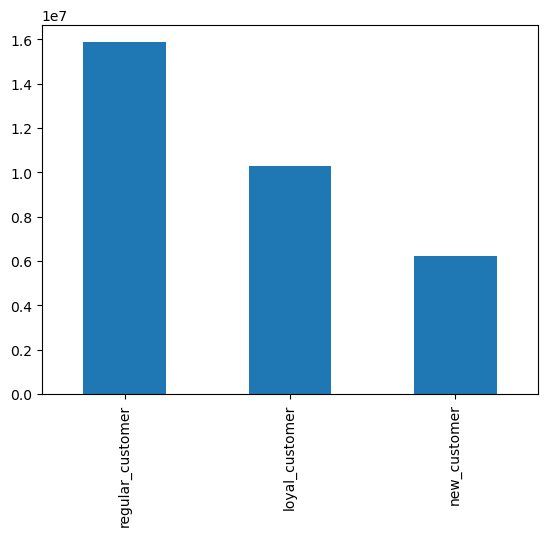

In [35]:
#barchart for loyalty
bar_loyalty=df['loyalty_flag'].value_counts().plot.bar()

In [36]:
# Export the bar chart

bar_loyalty.figure.savefig(os.path.join(path,'04 Analysis', 'Visualizations', 'cust_loyalty_flag.png' ))

#### Check whether there’s a difference in expenditure (the “prices” column) depending on the hour of the day. (Hint: To check this, you need to use an accurate sample for your line chart!)

In [24]:
df_hourly_price = small[['prices', 'order_hour_of_day'] ]

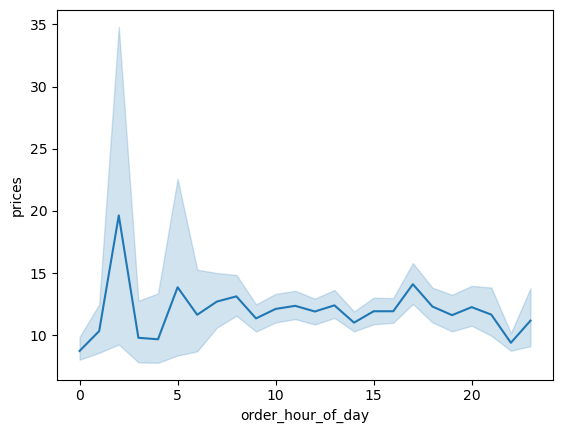

In [25]:
line_hourly = sns.lineplot(data = df_hourly_price, x = 'order_hour_of_day',y = 'prices')

In [46]:
#export data
line_hourly.figure.savefig(os.path.join(path,'04 Analysis', 'Visualizations', 'expenditures_hour.png' ))

#### Now that you have information about customers, you need to conduct some exploratory analysis of customer demographics to inform the targeted marketing campaigns. First, determine whether there’s a connection between age and family situation by creating a line chart exploring the connections between age and number of dependents:

In [27]:
df_cust_demo = small[['age', 'total_dependants']]

In [51]:
df_cust_demo

,age,total_dependants
0,31,3
2,31,3
3,31,3
6,31,3
10,31,3
...,...,...
32404841,25,0
32404842,25,0
32404843,25,0
32404849,25,0


Text(0.5, 1.0, 'Relationship of Age and Total Dependants')

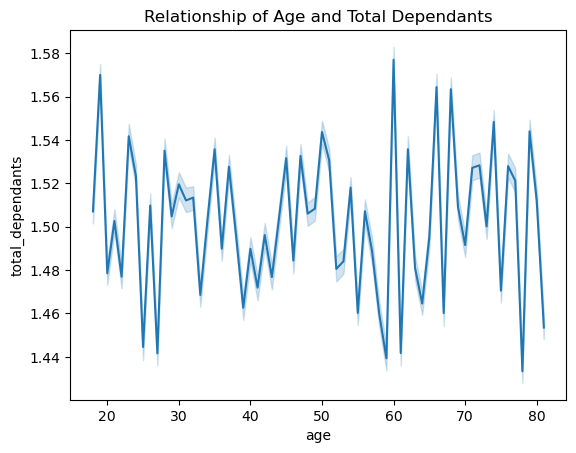

In [28]:
line_demographic = sns.lineplot (data = df_cust_demo,x = 'age', y = 'total_dependants')

plt.title("Relationship of Age and Total Dependants")


In [53]:
# Export the line chart

line_demographic.figure.savefig(os.path.join (path,'04 Analysis', 'Visualizations', 'age_dependants_connection.png'))

Not much difference between the different age groups and total number of dependants

#### You’ll also need to explore whether there’s a connection between age and spending power (income). To visualize this relationship, create a scatterplot using the sns.scatterplot() function.


In [54]:
df_age_income = small[['age', 'income']]

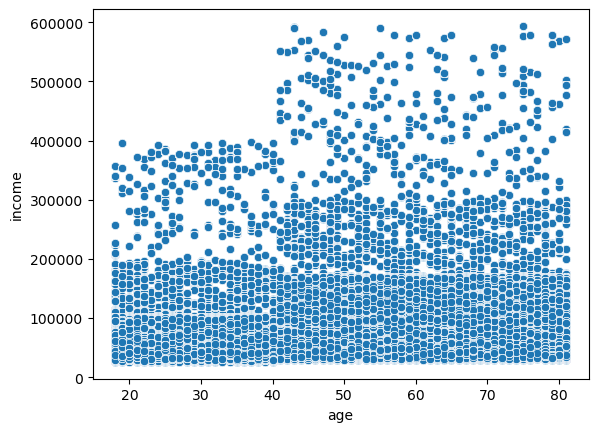

In [56]:
# Create a scatterplot

scatplt_age_income= sns.scatterplot(x = 'age', y = 'income',data = df_age_income)

Although most people earn roughly around 200.000 and below, the likelihood of earning more than that increases in age. this makes sense as people generally start to earn more as they gain more experience as they age.

In [57]:
# exporting scatterplot

scatplt_age_income.figure.savefig(os.path.join(path, 'plot_age_income.png'))